In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import time

# HW6

## Problem 1:

### For the C random number generator:

In [2]:
c_lib = np.loadtxt('rand_points.txt', delimiter=' ')

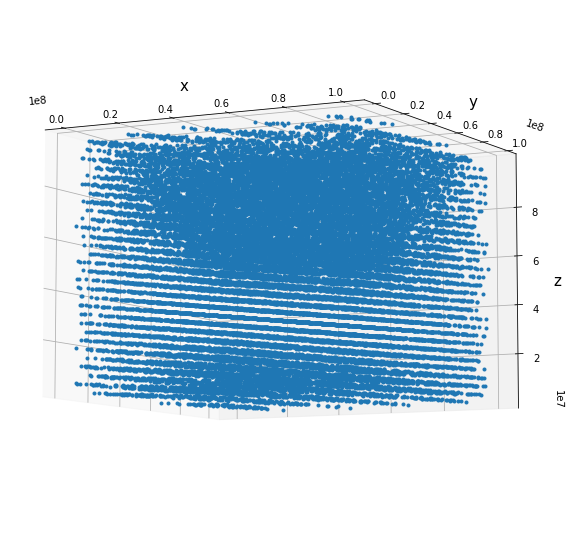

In [3]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')
ax.plot(xs = c_lib.T[0], ys = c_lib.T[1], zs = c_lib.T[2], linestyle='', marker='.')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
ax.view_init(elev=-7., azim=-62.)

The plot above clearly shows a correlation between the points.

### For the python random number generator:

In [4]:
py_lib = np.zeros(c_lib.shape)

random.seed(1)
for i in range(len(c_lib)):
    py_lib[i] = random.random(),random.random(),random.random()
    
py_lib = py_lib*1e8

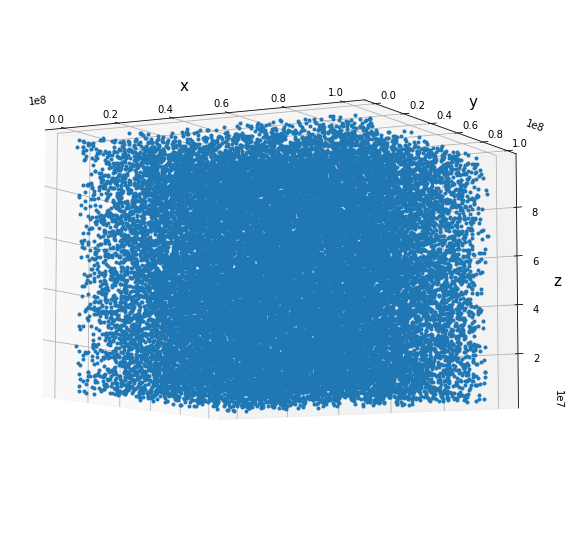

In [5]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs = py_lib.T[0], ys = py_lib.T[1], zs = py_lib.T[2], linestyle='', marker='.')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
ax.view_init(elev=-7., azim=-62.)

As opposed to the plot using the C library, there is no such correlation between the generated points when viewed at the same angle (or any angle).

### I wasn't able to reproduce this on my machine.

# Problem 2:

In [6]:
def lorentz_dev(n):
    x = np.random.rand(n)
    return np.tan(np.pi*(x-1/2.))

def gaussian_dev(n):
    #get the Gaussian deviate by using the Box-Muller method code from Pr Sievers.
    x=2*np.random.rand(n)-1
    y=2*np.random.rand(n)-1
    rsqr=(x**2+y**2)
    ind=rsqr<1
    x=x[ind]
    y=y[ind]
    rsqr=rsqr[ind]
    rr=np.sqrt(-2*np.log(rsqr)/rsqr)
    xx=x*rr
    yy=y*rr
    return xx, yy

def powerlaw_dev(n):
    x = np.random.rand(n)
    return 2*x**(-1/2.)


n = 10000000

### Using a Lorentzian to retrieve an exponential distribution

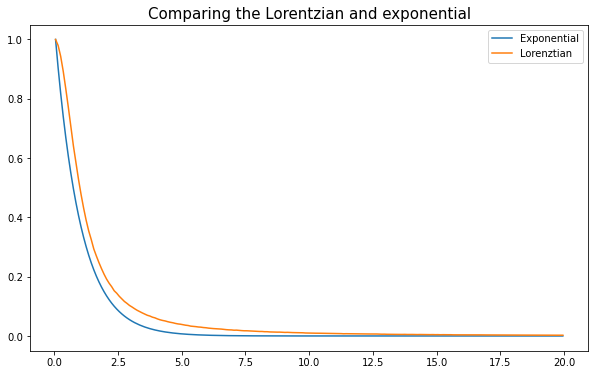

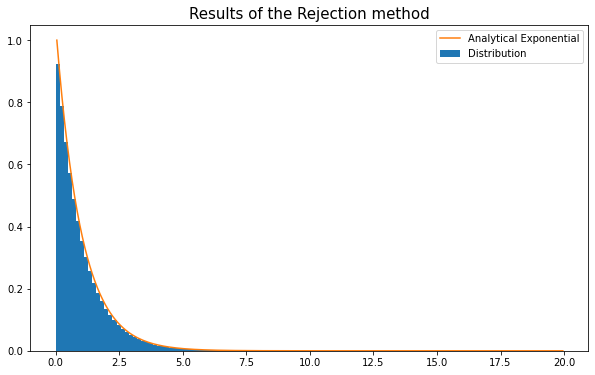

In [19]:
x = lorentz_dev(n)
xx = x[np.abs(x)<20]
xx = xx[xx>0]

a,b = np.histogram(xx, 200)
bb = 0.5*(b[1:]+b[:-1])

#Plot the two functions to make sure the Lorenztian is superior to the exponential at all points
plt.figure(figsize=(10,6))
plt.plot(bb, np.exp(-bb)/np.exp(-bb).max(), label='Exponential')
plt.plot(bb, a/a.max(), label='Lorenztian')
plt.title('Comparing the Lorentzian and exponential', fontsize=15)
plt.legend()

#Since we confirmed that the Lorenztian lies above the exponential, we can follow through with the rejection method:
t1 = time.time()
prob_lorentz = np.exp(-xx)/(1/(1+xx**2))
assert(np.max(prob_lorentz) <= 1)
accept = np.random.rand(len(prob_lorentz)) < prob_lorentz
t2 = time.time()

plt.figure(figsize=(10,6))
hist = plt.hist(xx[accept], 100, density=True, label='Distribution')
plt.plot(bb, np.exp(-bb)/np.exp(-bb).max(), label='Analytical Exponential')
plt.title('Results of the Rejection method', fontsize=15)
plt.legend()

In [8]:
print(f'Acceptance rate is {len(accept)/len(x)}')
print(f'Time diff is: {t2-t1}')

Acceptance rate is 0.4839768
Time diff is: 0.17233037948608398


The acceptance rate from the rejection method using a Lorentzian is about 50%. 

### Using a powerlaw to retrieve an exponential distribution

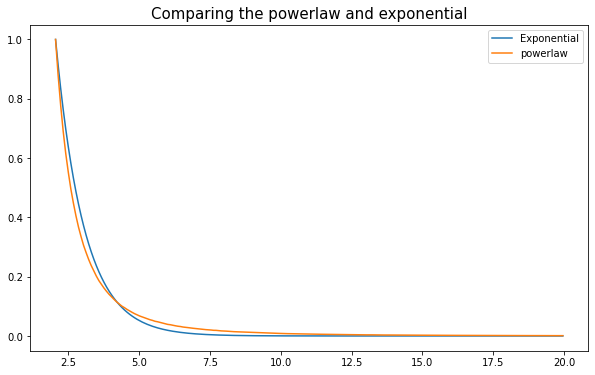

In [17]:
x = powerlaw_dev(n)
xx = x[np.abs(x)<20]
xx = xx[xx>0]

a,b = np.histogram(xx, 200)
bb = 0.5*(b[1:]+b[:-1])

#Plot the two functions to make sure the Lorenztian is powerlaw to the exponential at all points
plt.figure(figsize=(10,6))
plt.plot(bb, np.exp(-bb)/np.exp(-bb).max(), label='Exponential')
plt.plot(bb, a/a.max(), label='powerlaw')
plt.title('Comparing the powerlaw and exponential', fontsize=15)
plt.legend()

It looks like the powerlaw lies under the exponential for low values of x, in which case it cannot be used for the rejection method.

### Using a Gaussian to retrieve an exponential distribution

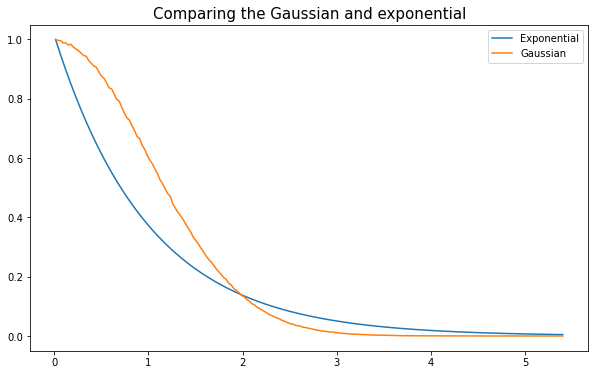

In [16]:
x,y = gaussian_dev(n)
xx = x[np.abs(x)<20]
xx = xx[xx>0]

a,b = np.histogram(xx, 200)
bb = 0.5*(b[1:]+b[:-1])

#Plot the two functions to make sure the Lorenztian is powerlaw to the exponential at all points
plt.figure(figsize=(10,6))
plt.plot(bb, np.exp(-bb)/np.exp(-bb).max(), label='Exponential')
plt.plot(bb, a/a.max(), label='Gaussian')
plt.title('Comparing the Gaussian and exponential', fontsize=15)
plt.legend()

As opposed to the powerlaw that lies underneath the exponential for low values of x, the Gaussian lies underneath it for high values of x. However, this still mean that the function cannot be used for a rejection method, as it is not bounding.

# Problem 3:

In [11]:
n = 10000000

u = np.random.rand(n)
v = np.random.rand(n)

t1 = time.time()
ratio = v/u
accept = u < np.sqrt(np.exp(-ratio))
accepted = ratio[accept]
t2 = time.time()


print(f'Acceptance rate is {len(accepted)/len(u)}')
print(f'Time diff is: {t2-t1}')

Acceptance rate is 0.499984
Time diff is: 0.30933213233947754


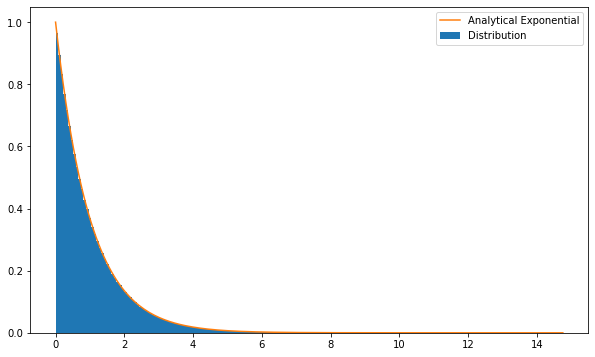

In [15]:
plt.figure(figsize=(10,6))
hist = plt.hist(accepted, bins=200, density=True, label='Distribution')
plt.plot(hist[1], np.exp(-hist[1])/np.exp(-hist[1]).max(), label='Analytical Exponential')
plt.legend()

If 0<u<1, the lower limit on v is 0.

The upper limit of v where the acceptance rate is maximized, and the distribution still follows an exponential is around 1. Below that, the acceptance rate skyrockets but the distribution no longer ressembles the curve, while above that, the acceptance rate drops.